EMAIL SPAM DETECTION

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.feature_extraction.text import *
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.pipeline import Pipeline
from sklearn.ensemble import *
from sklearn.preprocessing import *
from sklearn.metrics import *

In [186]:
data = pd.read_csv('spam.csv',encoding='latin1',usecols=[0,1])
data.head()

,out,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


DATA PREPROCESSING AND MODELING

<Axes: xlabel='out', ylabel='count'>

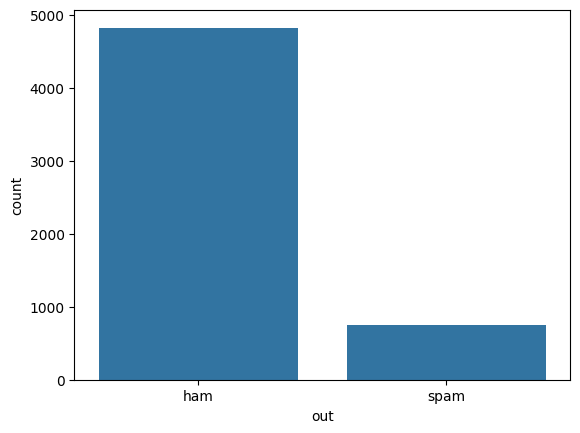

In [187]:
sns.countplot(data=data,x='out')

In [188]:
data.isnull().sum()

out     0
mail    0
dtype: int64

In [189]:
data.index.is_unique

True

In [190]:
X_train, X_test, y_train, y_test = train_test_split(data['mail'], data['out'], test_size=0.3, random_state=42)

tf = TfidfVectorizer(stop_words='english')
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)


RandomForestClassifier()
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']
Accuracy : 98.02631578947368
AdaBoostClassifier()
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']
Accuracy : 98.02631578947368


<Axes: >

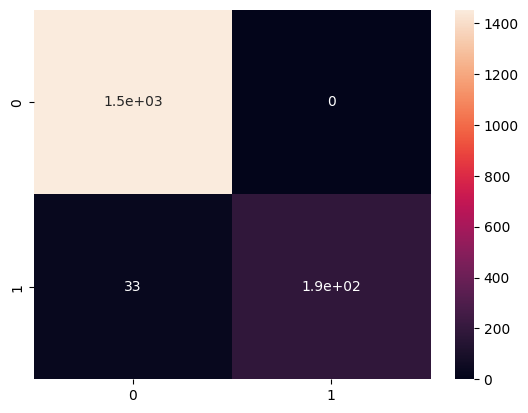

In [191]:
model = RandomForestClassifier(criterion='gini')
model.fit(X_train_tf,y_train)
print(model)

prediction = model.predict(X_test_tf)

print(prediction)

accuracy = accuracy_score(y_test,prediction)*100
print("Accuracy :",accuracy)

model1 = AdaBoostClassifier()
model1.fit(X_train_tf,y_train)
print(model1)

prediction1 = model1.predict(X_test_tf)
print(prediction1)

accuracy1 = accuracy_score(y_test,prediction1)*100
print("Accuracy :",accuracy)


sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

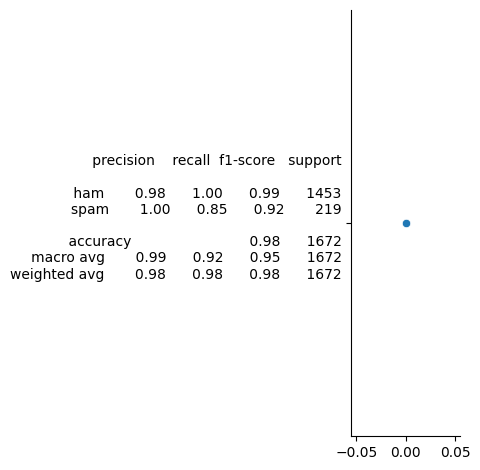

In [196]:
sns.relplot(classification_report(y_test,prediction))